# Preprocessing & EDA

Meteorological Parameters & Data Units

| Code      | Meaning      | Unit   |
|-------------|-------------|------------|
| temp   | Air Temperature   | °C   |
| dwpt   | Dew Point   | °C   |
| rhum   | Relative Humidity  | %   |
| prcp   | Total Precipitation  | mm   |
| snow   | Snow Depth   | mm   |
| wdir   | Wind (From) Direction   | Degrees   |
| wspd   | Average Wind Speed   | km/h   |
| wpgt   | Wind Peak Gust   | km/h   |
| pres   | Sea-Leavel Air Pressure   | hPa   |
| tsun   | Total Sunshine Duration   | Minutes
| coco   | Weather Condition Code   | 

Weather Condition Codes
| Code | Weather Condition       |
|------|--------------------------|
| 1    | Clear                   |
| 2    | Fair                    |
| 3    | Cloudy                  |
| 4    | Overcast                |
| 5    | Fog                     |
| 6    | Freezing Fog            |
| 7    | Light Rain              |
| 8    | Rain                    |
| 9    | Heavy Rain              |
| 10   | Freezing Rain           |
| 11   | Heavy Freezing Rain     |
| 12   | Sleet                   |
| 13   | Heavy Sleet             |
| 14   | Light Snowfall          |
| 15   | Snowfall                |
| 16   | Heavy Snowfall          |
| 17   | Rain Shower             |
| 18   | Heavy Rain Shower       |
| 19   | Sleet Shower            |
| 20   | Heavy Sleet Shower      |
| 21   | Snow Shower             |
| 22   | Heavy Snow Shower       |
| 23   | Lightning               |
| 24   | Hail                    |
| 25   | Thunderstorm            |
| 26   | Heavy Thunderstorm      |
| 27   | Storm                   |

source: https://dev.meteostat.net/formats.html#meteorological-parameters

In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import warnings 
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('./data/origin/weatherQN_2021_2025.csv')
df.head(10)

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
0,2021-01-01 07:00:00,22.1,14.7,63.0,NaN,NaN,360.0,14.4,NaN,1017.5,NaN,NaN
1,2021-01-01 10:00:00,21.5,16.9,75.0,NaN,NaN,340.0,14.4,NaN,1018.4,NaN,NaN
2,2021-01-01 13:00:00,21.5,16.9,75.0,NaN,NaN,340.0,10.8,NaN,1017.0,NaN,NaN
3,2021-01-01 16:00:00,22.2,17.8,76.0,NaN,NaN,360.0,14.4,NaN,1016.0,NaN,NaN
4,2021-01-01 19:00:00,22.0,16.9,73.0,NaN,NaN,340.0,7.2,NaN,1017.6,NaN,NaN
5,2021-01-01 22:00:00,21.0,16.6,76.0,NaN,NaN,340.0,10.8,NaN,1017.7,NaN,NaN
6,2021-01-02 00:00:00,20.0,17.4,85.0,NaN,NaN,350.0,20.2,NaN,1017.9,NaN,NaN
7,2021-01-02 01:00:00,20.0,17.8,87.0,0.2,NaN,340.0,14.4,NaN,1016.8,NaN,NaN
8,2021-01-02 02:00:00,20.1,17.5,85.0,0.1,NaN,348.0,18.7,NaN,1016.5,NaN,NaN
9,2021-01-02 03:00:00,20.0,17.8,87.0,0.2,NaN,343.0,17.6,NaN,1016.1,NaN,NaN


In [63]:
df.shape

(35304, 12)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35304 entries, 0 to 35303
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    35304 non-null  object 
 1   temp    35304 non-null  float64
 2   dwpt    35304 non-null  float64
 3   rhum    35304 non-null  float64
 4   prcp    35215 non-null  float64
 5   snow    0 non-null      float64
 6   wdir    35304 non-null  float64
 7   wspd    35304 non-null  float64
 8   wpgt    0 non-null      float64
 9   pres    35304 non-null  float64
 10  tsun    0 non-null      float64
 11  coco    22591 non-null  float64
dtypes: float64(11), object(1)
memory usage: 3.2+ MB


In [65]:
# Show NaN count each column
df.isna().sum()

time        0
temp        0
dwpt        0
rhum        0
prcp       89
snow    35304
wdir        0
wspd        0
wpgt    35304
pres        0
tsun    35304
coco    12713
dtype: int64

Drop `snow`, `wpgt` and `tsun` because there're no value of them in the dataframe.

In [66]:
col_to_drop = ["snow", "wpgt", "tsun"]
df.drop(col_to_drop, inplace = True, axis = 1)

Take `year`, `month`, `day` from the `date` 

In [67]:
df["year"] = pd.to_datetime(df["time"]).dt.year
df["month"] = pd.to_datetime(df["time"]).dt.month
df["day"] = pd.to_datetime(df["time"]).dt.day
df["hour"] = pd.to_datetime(df["time"]).dt.hour

In [68]:
df["year"].value_counts()

year
2023    8760
2021    8742
2022    8740
2024    8599
2025     463
Name: count, dtype: int64

In [69]:
# 2025 data is not complete, so we will drop it
df = df[df["year"] != 2025]

### What is  the hotest temperature by year?

In [70]:
# Hotest temperature by year
hotest_by_year  = df.groupby("year")["temp"].max()
hotest_by_year

year
2021    38.1
2022    36.9
2023    39.5
2024    38.8
Name: temp, dtype: float64

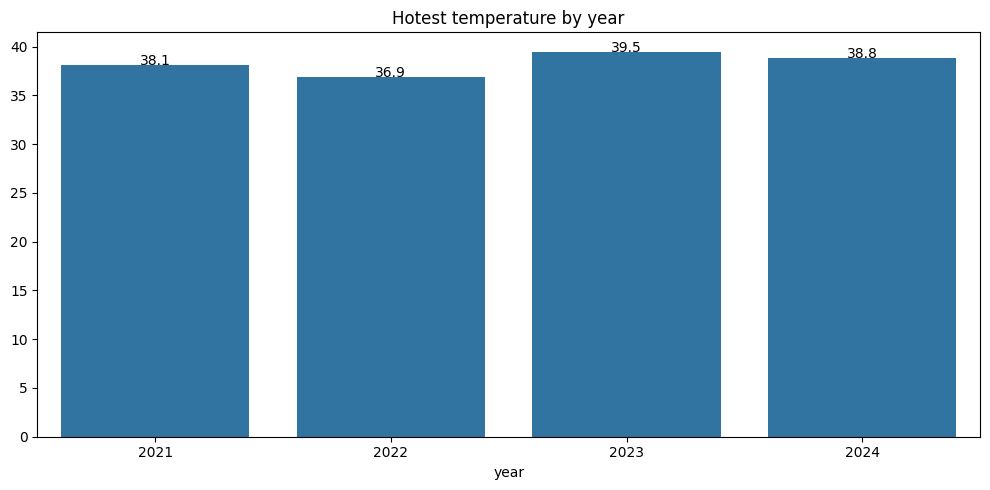

In [71]:
# Bar plot of hotest temperature by year
plt.figure(figsize=(10, 5))

ax = sns.barplot(x = hotest_by_year.index, y = hotest_by_year.values)
plt.title("Hotest temperature by year")

for i, v in enumerate(hotest_by_year.values):
    ax.text(i, v, v, color='black', ha="center")
    
plt.tight_layout()
plt.show()

So, **2023** has the hottest temperature up to **39.5 degrees Celsius**.

### What is the coldest temperature by year?

In [72]:
# coldest temperature by year
coldest_by_year  = df.groupby("year")["temp"].min()
coldest_by_year

year
2021    16.1
2022    18.8
2023    17.2
2024    19.0
Name: temp, dtype: float64

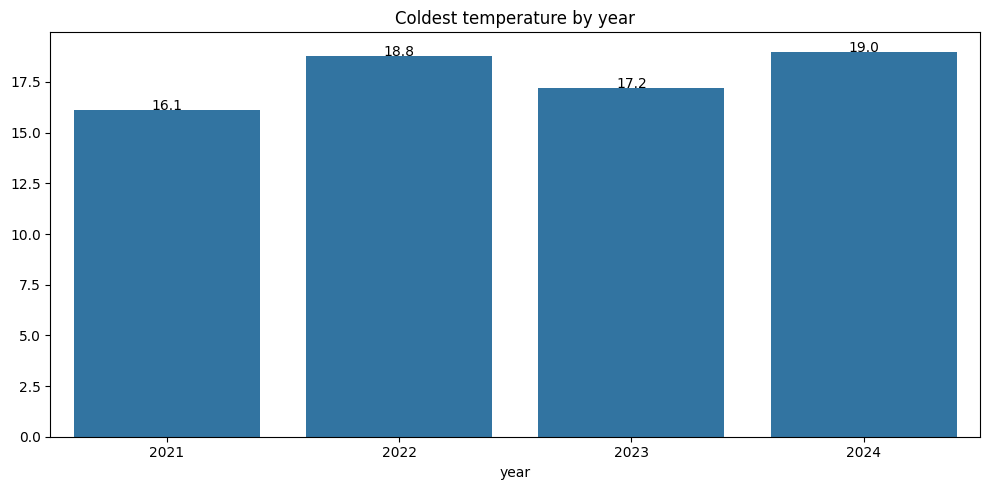

In [73]:
# Bar plot of hotest temperature by year
plt.figure(figsize=(10, 5))

ax = sns.barplot(x = coldest_by_year.index, y = coldest_by_year.values)
plt.title("Coldest temperature by year")

for i, v in enumerate(coldest_by_year.values):
    ax.text(i, v, v, color='black', ha="center")
    
plt.tight_layout()
plt.show()

So, **2021** has the coldest temperature up to **16.1 degrees Celsius**.

## What is the most popular Wind Direction in Quy Nhon city? 
Determining the most popular wind direction in Quy Nhon city can provide critical insights for the development of wind turbines and other clean energy solutions. By understanding the predominant wind patterns, urban planners and engineers can:
1. Optimize Wind Turbine Placement
2. Improve Building Design and Urban Planning
3. Boost Agricultural Efficiency


<img src="https://dev.qweather.com/assets/images/content/wind-direction-rose.png" alt="Wind direction mapping" style="width:400px;">

In [74]:
df["wdir"].nunique()

361

There're 361 distince values of `wdir` in the dataset but I'll limit the value of Windirection to only 4 direction:
+ North [315, 360] and [0, 45)
+ East [45, 135)
+ South [135, 225)
+ North [225, 135)

In [75]:
def convert_wdir_to_direction(wdir):
    if wdir >= 315 or wdir < 45:
        return "N"
    if wdir >= 45 and wdir < 135:
        return "E"
    if wdir >= 135 and wdir < 225:
        return "S"
    if wdir >= 225 and wdir < 315:
        return "W"
    
df["direction"] = df["wdir"].apply(convert_wdir_to_direction)

In [76]:
direction_count = df["direction"].value_counts()
direction_count

direction
N    14889
W     9090
S     6662
E     4200
Name: count, dtype: int64

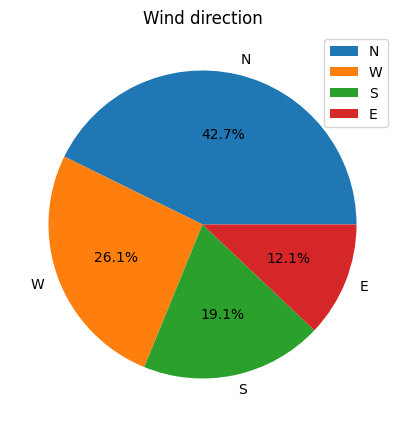

In [77]:
# Pie chart of wind direction
plt.figure(figsize=(10, 5))

plt.pie(direction_count, labels = direction_count.index, autopct='%1.1f%%')
plt.title("Wind direction")

plt.legend()
plt.show()

From the pie chart above, we can observe that **the most popular wind direction** in Quy Nhon City is `North` **(42.7%)**.

## What is the coldest and hottest months by year?
Identifying the coldest and hottest months in Quy Nhon by year provides valuable insights that can benefit various sectors:
1. Tourism Development
2. Agricultural Planning
3. Health and Safety Measures

In [78]:
# take average temp by month and year
avg_temp_by_month = df.groupby(["year", "month"])["temp"].mean()
avg_temp_by_month

year  month
2021  1        21.707163
      2        22.648363
      3        25.644489
      4        27.171944
      5        28.825672
      6        30.905278
      7        29.841398
      8        29.926075
      9        27.487639
      10       26.617876
      11       25.080000
      12       23.476882
2022  1        23.619086
      2        23.652381
      3        25.677554
      4        26.018889
      5        27.867127
      6        29.315417
      7        28.861425
      8        28.620833
      9        27.356944
      10       25.796774
      11       25.750278
      12       23.173656
2023  1        22.453898
      2        23.739435
      3        24.468011
      4        27.812500
      5        29.004704
      6        29.924306
      7        29.559543
      8        30.867608
      9        28.573194
      10       26.871640
      11       25.552083
      12       24.397715
2024  1        23.492742
      2        24.377874
      3        25.723387
      4      

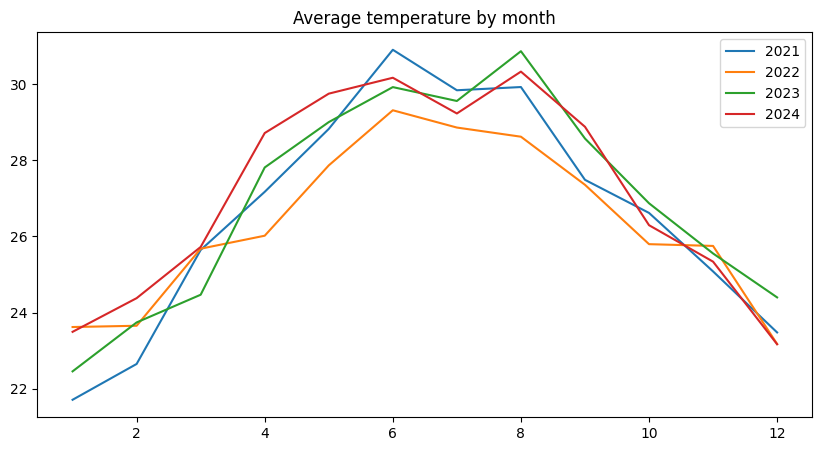

In [79]:
plt.figure(figsize=(10, 5))

for year in avg_temp_by_month.index.levels[0]:
    plt.plot(avg_temp_by_month[year].index, avg_temp_by_month[year].values, label = year)

plt.title("Average temperature by month")
plt.legend()
plt.show()

From the line plot above, we can gather valuable insights.
+  Between 2021 and 2024, the temperature trends appear relatively consistent. 
+  The **hottest months** in Quy Nhon are typically **June** and **August**
+  While the **coldest months** are **December** and **January**.
+  
Interestingly, the line plot resembles an inverted bell shape, similar to the curve of a [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution).